# Data Science

## Notebook 4 (Character recognition with Keras)

### Character recoginition with Keras

(Thnaks to Róbert Pálovics)

In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from PIL import ImageOps
import numpy as np
from matplotlib.pyplot import imshow
sns.set(font="Droid Sans",font_scale = 2)
sns.set_style("white")
sns.set_color_codes("dark")

#### MNIST Dataset
* Pictures of 28x28 pixels
* Possible labels: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 (multi-class classifcation)
* 28x28 = 784 attributes
* Trainging data with 60000 records

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


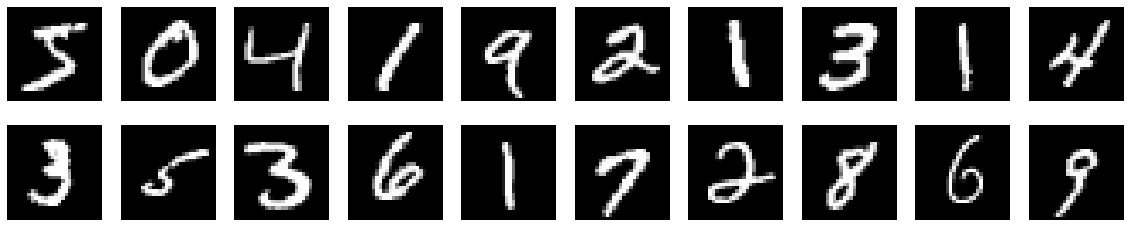

In [4]:
plt.figure(figsize=(20,4))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

In [5]:
from tensorflow.keras.utils import to_categorical
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

 #### Modeling

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [7]:
model = Sequential([
    Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu', data_format="channels_first"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(15, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(50, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Further details: http://adventuresinmachinelearning.com/keras-tutorial-cnn-11-lines/

In [9]:
accuracy = []
train_percent = 0.05
iter = 20
for i in range(iter):
    model.fit(X_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)], y_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)],batch_size=100, epochs=1,verbose=0, validation_split=0.1)
    score = model.evaluate(X_test, y_test, verbose=0)
    accuracy.append(score[1])

InvalidArgumentError:  Conv2DCustomBackpropFilterOp only supports NHWC.
	 [[node Conv2DBackpropFilter_1 (defined at <ipython-input-8-0cee337c5541>:5) ]] [Op:__inference_distributed_function_1034]

Function call stack:
distributed_function


In [ ]:
X = np.arange(iter)
plt.figure(figsize=(15,8))
plt.plot(X*int(train_percent*60000),accuracy,"o-",label="SGD")
plt.legend(loc=4)
plt.grid()
plt.xlabel("number of processed training instances")
plt.ylabel("accuracy on the test set")

### Testing on own handwritten digits

In [ ]:
# visualizing hand-written digits
thresholds = {}
thresholds[ 0 ] = ( 225 , 229 , 451 , 458 )
thresholds[ 1 ] = ( 675 , 229 , 901 , 458 )
thresholds[ 2 ] = ( 1126 , 229 , 1352 , 458 )
thresholds[ 3 ] = ( 1576 , 229 , 1802 , 458 )
thresholds[ 4 ] = ( 2027 , 229 , 2253 , 458 )
thresholds[ 5 ] = ( 225 , 687 , 451 , 916 )
thresholds[ 6 ] = ( 675 , 687 , 901 , 916 )
thresholds[ 7 ] = ( 1126 , 687 , 1352 , 916 )
thresholds[ 8 ] = ( 1576 , 687 , 1802 , 916 )
thresholds[ 9 ] = ( 2027 , 687 , 2253 , 916 )

import requests

plt.figure( figsize = ( 50 , 10 ) )
for i in range( 10 ):
    response = requests.get("https://math.bme.hu/~marcessz/images_dv/digits.jpg", stream=True)
    image = Image.open(response.raw)
    width, height = image.size
    image = image.crop( thresholds[ i ] )
    image = ImageOps.invert( image )
    image.thumbnail( ( 28 , 28 ) )
    image_data = np.asarray( image , dtype = np.uint8 )
    image_data = image_data.sum( 2 ).astype( float )
    image_data /= image_data.max()
    plt.subplot( 2 , 5 , i + 1 )
    plt.imshow( image_data, cmap = plt.cm.gray )

In [ ]:
# using the trained model to recognize hand-written digits
plt.figure( figsize = ( 40 , 12 ) )
for i in range( 10 ):
    response = requests.get("https://math.bme.hu/~marcessz/images_dv/digits.jpg", stream=True)
    image = Image.open(response.raw)
    width, height = image.size
    image = image.crop( thresholds[ i ] )
    image = ImageOps.invert( image )
    image.thumbnail( ( 28 , 28 ) )
    image_data = np.asarray( image , dtype = np.uint8 )
    image_data = image_data.sum( 2 ).astype( float )
    image_data /= image_data.max()
    image_data = image_data.reshape( 1 , 1 , 28 , 28 )
    predictions = model.predict( image_data > 0.8 )
    plt.subplot( 2 , 5 , i + 1 )
    plt.bar( range( 10 ) , predictions[ 0 ] , 0.3 , color = "b" , alpha = 0.6 )
    plt.title( i )
    plt.grid()
    plt.xticks( range( 10 ) )